In [3]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

In [4]:
# Number of pairs feature/label.
M = 1000

In [5]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

#Create target function
#sigma = Desvio Padrão
#sigma^2 = Variância
#Sigma*np.random.randn(...) + mu

# Input values (features)
x = -5 + 10*np.random.rand(M, 1)
w = np.sqrt(10)*np.random.randn(M, 1)

# Output values (targets).
y = 3 + 1.5*x + 2.3*x**2 + w

In [6]:
# Concatenate both column vectors.
X = np.c_[np.ones((M,1)), x, x**2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

#a opt
yhat = a_opt[0,0] + a_opt[1,0]*x + a_opt[2,0]*x**2    
J_opt = (1/M)*np.sum(np.power((y - yhat),2) )

In [7]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.005
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.zeros((3,1))
a[0] = -10;
a[1] = -10;
a[2] = -10;

# Create vector for parameter history.
a_hist = np.zeros((3, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]
a_hist[2, 0] = a[2]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((3, n_iterations), dtype=np.float64)
#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    grad_hist[2, iteration] = gradients[2]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    a_hist[2, iteration+1] = a[2]
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

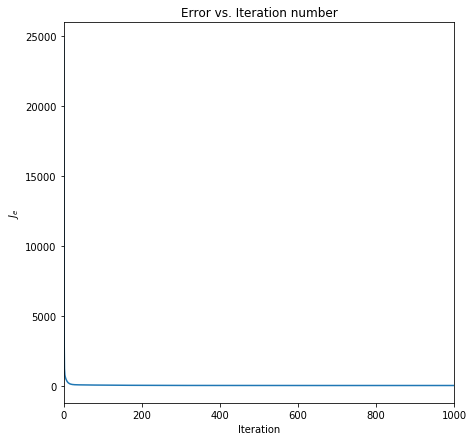

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("Erro_versus_Interação.png", dpi=600)

In [9]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))
print('a2_opt: ' + str(a_opt[2, 0]))
print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))
print('a2_gd: ' + str(a[2, 0]))

a1_opt: 2.9843548587001365
a2_opt: 1.4884601264306463
a2_opt: 2.3073110979259632
a1_gd: 2.829885165950403
a2_gd: 1.4889411082622674
a2_gd: 2.317344697792187
